**# Classifying newswires: A multiclass classification example**
# **The Reuters dataset**
**Loading the Reuters dataset**

In [ ]:
import tensorflow as tf
reuters=tf.keras.datasets.reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

# **Preparing the data**

**Encoding the input data**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
to_categorical=tf.keras.utils.to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# **Building your model**

**Model definition**

In [ ]:
layers=tf.keras.layers
model = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# **Validating your approach**

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 6s 46ms/step - loss: 2.9076 - accuracy: 0.4684 - val_loss: 2.0348 - val_accuracy: 0.5840
Epoch 2/20
16/16 [==============================] - 0s 21ms/step - loss: 1.6795 - accuracy: 0.6483 - val_loss: 1.4701 - val_accuracy: 0.6660
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.2550 - accuracy: 0.7219 - val_loss: 1.2474 - val_accuracy: 0.7250
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0108 - accuracy: 0.7779 - val_loss: 1.1192 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8329 - accuracy: 0.8206 - val_loss: 1.0518 - val_accuracy: 0.7530
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6963 - accuracy: 0.8524 - val_loss: 0.9771 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5830 - accuracy: 0.8789 - val_loss: 0.9145 - val_accuracy: 0.8110
Epoch 8/20
16

**Plotting the training and validation loss**

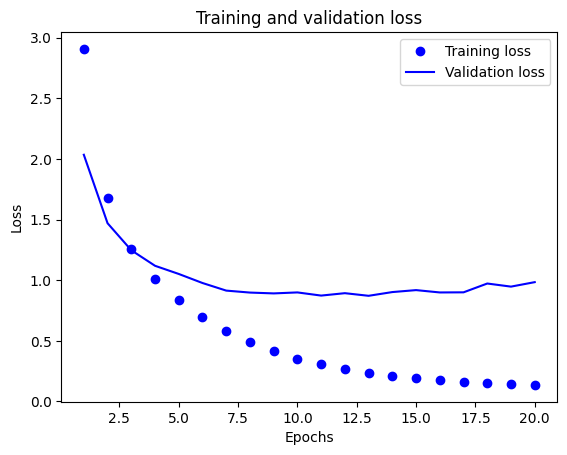

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

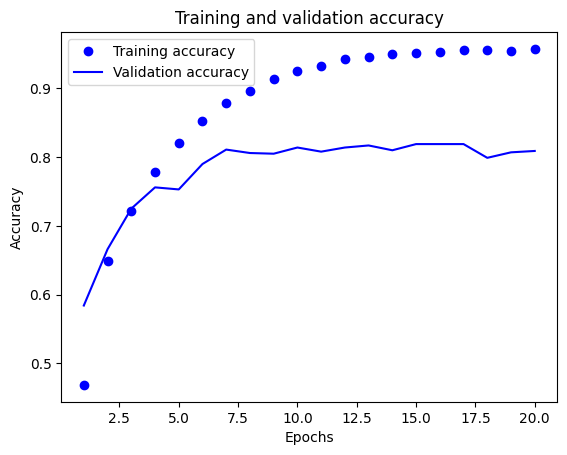

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

here,using softmax as activation function for the output layer it will generate 46 different outputs.say max output value is 0.8 then other 45 value will all add up to 0.2

here loss function is categorical_crossentropy for calculating difference between the actual output and predicted output.

In [ ]:
model = tf.keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/9
16/16 [==============================] - 1s 34ms/step - loss: 2.7972 - accuracy: 0.5066 - val_loss: 1.9330 - val_accuracy: 0.6140
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.6123 - accuracy: 0.6736 - val_loss: 1.4186 - val_accuracy: 0.6890
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.2233 - accuracy: 0.7357 - val_loss: 1.2245 - val_accuracy: 0.7470
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.9999 - accuracy: 0.7893 - val_loss: 1.1051 - val_accuracy: 0.7620
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8393 - accuracy: 0.8205 - val_loss: 1.0261 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.7064 - accuracy: 0.8513 - val_loss: 0.9735 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.5950 - accuracy: 0.8757 - val_loss: 0.9472 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9539434313774109, 0.7876224517822266]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.20213713268032057

# **Generating predictions on new data**

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

# **A different way to handle the labels and the loss**

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# **The importance of having sufficiently large intermediate layers**

**A model with an information bottleneck**

In [ ]:
model = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 2.9571 - accuracy: 0.1465 - val_loss: 2.3236 - val_accuracy: 0.4380
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.9988 - accuracy: 0.4624 - val_loss: 1.8395 - val_accuracy: 0.4650
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6453 - accuracy: 0.4952 - val_loss: 1.6090 - val_accuracy: 0.6070
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3808 - accuracy: 0.6673 - val_loss: 1.4596 - val_accuracy: 0.6480
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2249 - accuracy: 0.6919 - val_loss: 1.4020 - val_accuracy: 0.6640
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1295 - accuracy: 0.7194 - val_loss: 1.3855 - val_accuracy: 0.6720
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0615 - accuracy: 0.7373 - val_loss: 1.3657 - val_accuracy: 0.6760
Epoch 8/20
63/63 [=

In [34]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.7679 - accuracy: 0.6643


In [35]:
results

[1.7679095268249512, 0.6642920970916748]

In [36]:
model.predict(x_test)

71/71 [==============================] - 0s 4ms/step


array([[1.2283011e-06, 3.5048635e-07, 7.6021298e-18, ..., 4.0140895e-17,
        4.8829109e-16, 6.5896355e-13],
       [4.2211628e-03, 1.0921135e-01, 3.9471615e-02, ..., 1.7497190e-06,
        1.3052293e-08, 7.2916952e-09],
       [1.7462969e-02, 2.2338462e-01, 2.6228577e-02, ..., 5.7302814e-06,
        1.3950735e-07, 1.2794737e-07],
       ...,
       [9.8196545e-04, 1.4881061e-03, 4.1312331e-10, ..., 2.6311840e-11,
        2.1485999e-11, 1.3092071e-09],
       [5.9166998e-03, 2.8605505e-03, 9.7853820e-07, ..., 7.8369095e-07,
        1.5459595e-06, 1.9075429e-05],
       [1.3003084e-02, 6.3653427e-01, 1.8117347e-03, ..., 4.8002523e-08,
        6.3543934e-11, 1.2685303e-10]], dtype=float32)

In [ ]:
!jupyter nbconvert --to html MulticlassClassificationScript.ipynb